In [1]:
import GPy
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal
from sklearn.model_selection import train_test_split

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.data import Data, Dataset
from torch_geometric.nn import GCNConv

from tqdm import tqdm
import haversine as hs
import networkx as nx

device = 'cuda' if torch.cuda.is_available() else 'cpu'
seed = 42
torch.manual_seed(seed)
torch.random.manual_seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
%config InlineBackend.figure_format = 'retina'

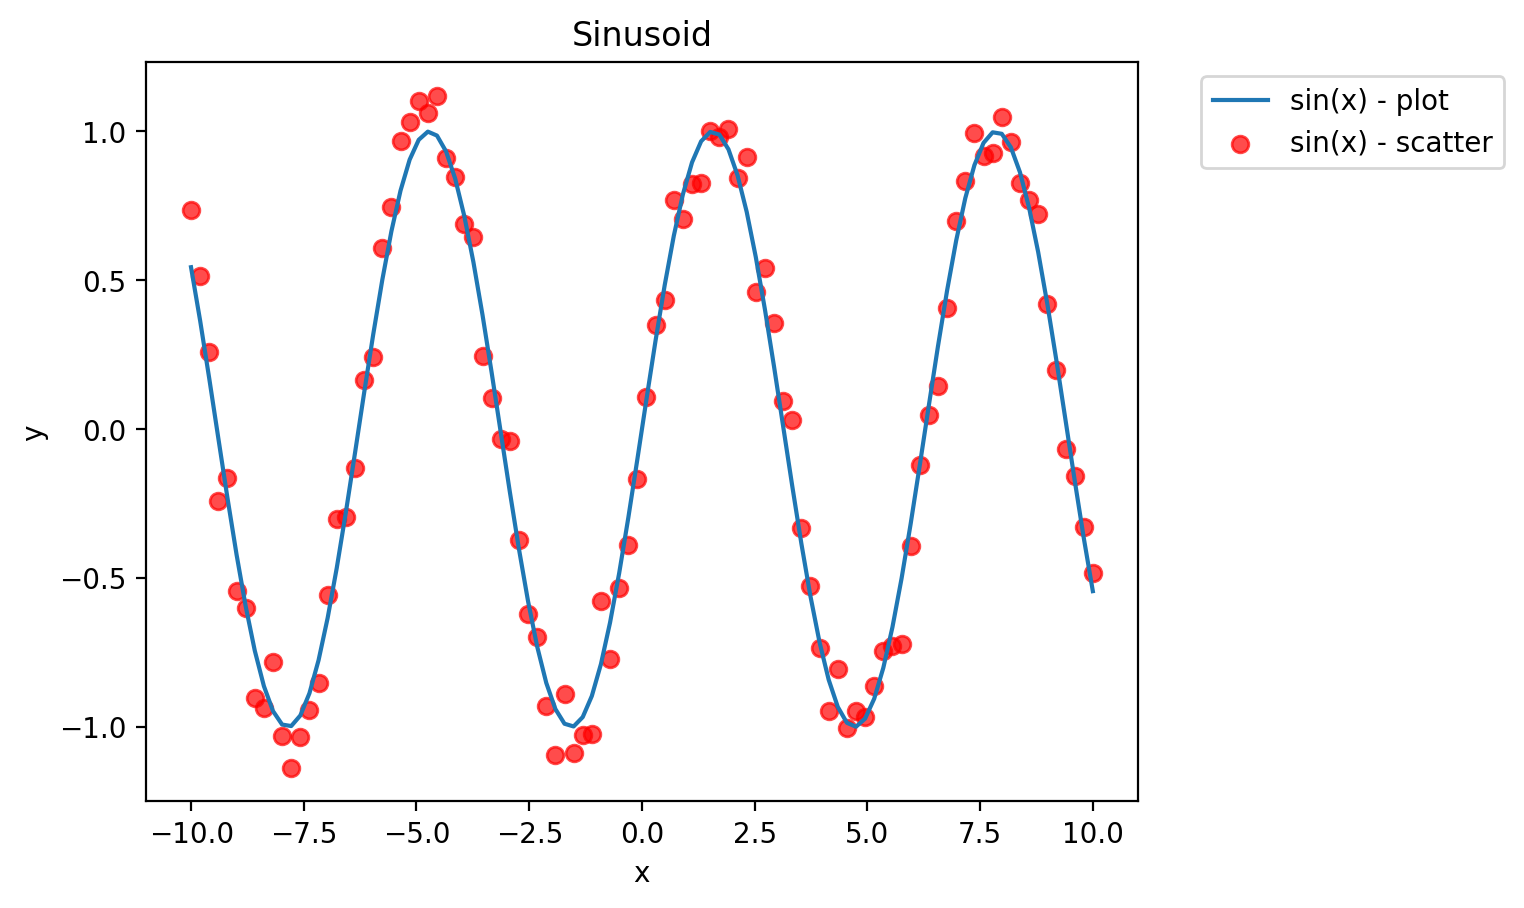

In [2]:
n_points = 100

x = torch.linspace(-10, 10, n_points)

y = torch.sin(x) + torch.randn(n_points) * 0.1
plt.plot(x, torch.sin(x) );
plt.scatter(x, y, c = 'red', alpha = 0.7)
plt.title('Sinusoid')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['sin(x) - plot', 'sin(x) - scatter'],bbox_to_anchor=(1.05, 1.0), loc='upper left');

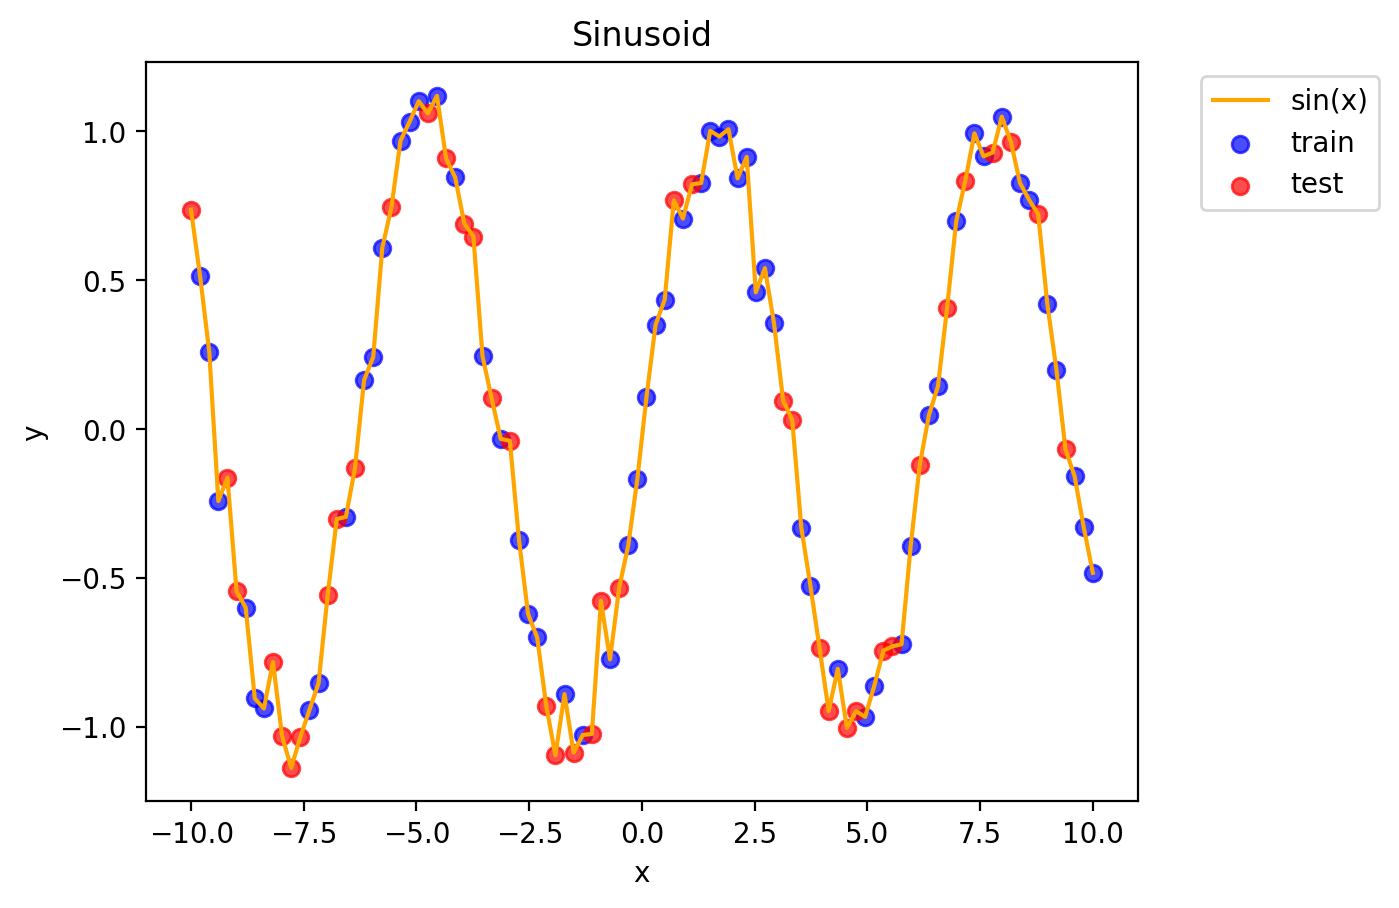

In [3]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.4)
plt.plot(x, y, color = 'orange')
plt.scatter(train_x, train_y, c = 'blue', alpha = 0.7)
plt.scatter(test_x, test_y, c='red', alpha = 0.7)
plt.title('Sinusoid')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['sin(x)', 'train', 'test'],bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

In [4]:
train_mask = torch.zeros(x.shape[0], dtype=torch.bool)
test_mask = torch.zeros(x.shape[0], dtype=torch.bool)
for i in range(x.shape[0]):
    if x[i] in train_x:
        train_mask[i] = True
    else:
        test_mask[i] = True

In [5]:
def get_edge_list(x):
    edge_list = []
    for i in range(len(x)):  
            for j in range(i+1, i+5):
                if j >= len(x):
                    break
                edge_list.append((i, j))
                edge_list.append((j, i))
                
    return torch.tensor(edge_list).T

In [6]:
edge_list = get_edge_list(x)
data = Data(x=x, edge_index=edge_list, y=y, train_mask=train_mask, test_mask=test_mask).to(device)

In [7]:
class RegressionModel_1(nn.Module):
    def __init__(self, input_dim):
        super(RegressionModel_1, self).__init__()
        self.conv1 = GCNConv(input_dim, 32)
        self.linear1 = nn.Linear(32, 16)
        self.linear2 = nn.Linear(16, 1)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.linear1(x)
        x = F.relu(x)
        x = self.linear2(x)
        return x

class RegressionModel_2(nn.Module):
    def __init__(self, input_dim):
        super(RegressionModel_2, self).__init__()
        self.conv1 = GCNConv(input_dim, 32)
        self.conv2 = GCNConv(32, 16)
        self.linear1 = nn.Linear(16, 16)
        self.linear2 = nn.Linear(16, 1)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        x = self.linear1(x)
        x = F.relu(x)
        x = self.linear2(x)
        return x
    
class RegressionModel_3(nn.Module):
    def __init__(self, input_dim):
        super(RegressionModel_3, self).__init__()
        self.conv1 = GCNConv(input_dim, 16)
        self.conv2 = GCNConv(16, 32)
        self.conv3 = GCNConv(32, 16)
        self.linear1 = nn.Linear(16, 16)
        self.linear2 = nn.Linear(16, 1)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        x = F.relu(x)
        x = self.conv3(x, edge_index)
        x = self.linear1(x)
        x = F.relu(x)
        x = self.linear2(x)
        return x
    
class RegressionModel_4(nn.Module):
    def __init__(self, input_dim):
        super(RegressionModel_4, self).__init__()
        self.conv1 = GCNConv(input_dim, 16)
        self.conv2 = GCNConv(16, 32)
        self.conv3 = GCNConv(32, 16)
        self.conv4 = GCNConv(16, 16)
        self.linear1 = nn.Linear(16, 16)
        self.linear2 = nn.Linear(16, 1)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        x = F.relu(x)
        x = self.conv3(x, edge_index)
        x = F.relu(x)
        x = self.conv4(x, edge_index)
        x = self.linear1(x)
        x = F.relu(x)
        x = self.linear2(x)
        return x

class RegressionModel_5(nn.Module):
    def __init__(self, input_dim):
        super(RegressionModel_5, self).__init__()
        self.conv1 = GCNConv(input_dim, 16)
        self.conv2 = GCNConv(16, 32)
        self.conv3 = GCNConv(32, 16)
        self.conv4 = GCNConv(16, 16)
        self.conv5 = GCNConv(16, 16)
        self.linear1 = nn.Linear(16, 16)
        self.linear2 = nn.Linear(16, 1)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        x = F.relu(x)
        x = self.conv3(x, edge_index)
        x = F.relu(x)
        x = self.conv4(x, edge_index)        
        x = F.relu(x)
        x = self.conv5(x, edge_index)
        x = self.linear1(x)
        x = F.relu(x)
        x = self.linear2(x)
        
        return x

# With One Layer

100%|██████████| 5000/5000 [00:17<00:00, 292.03it/s]


Train RMSE 0.41697645
Test RMSE 0.47528225


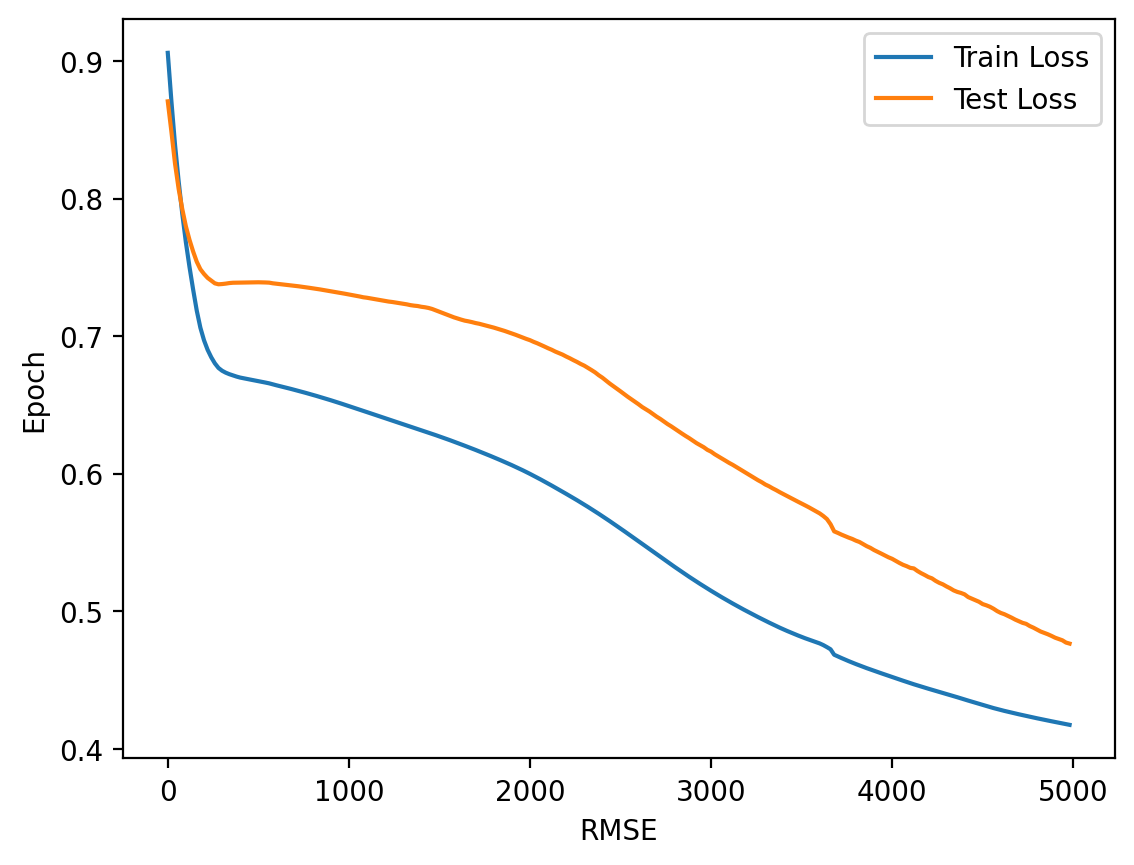

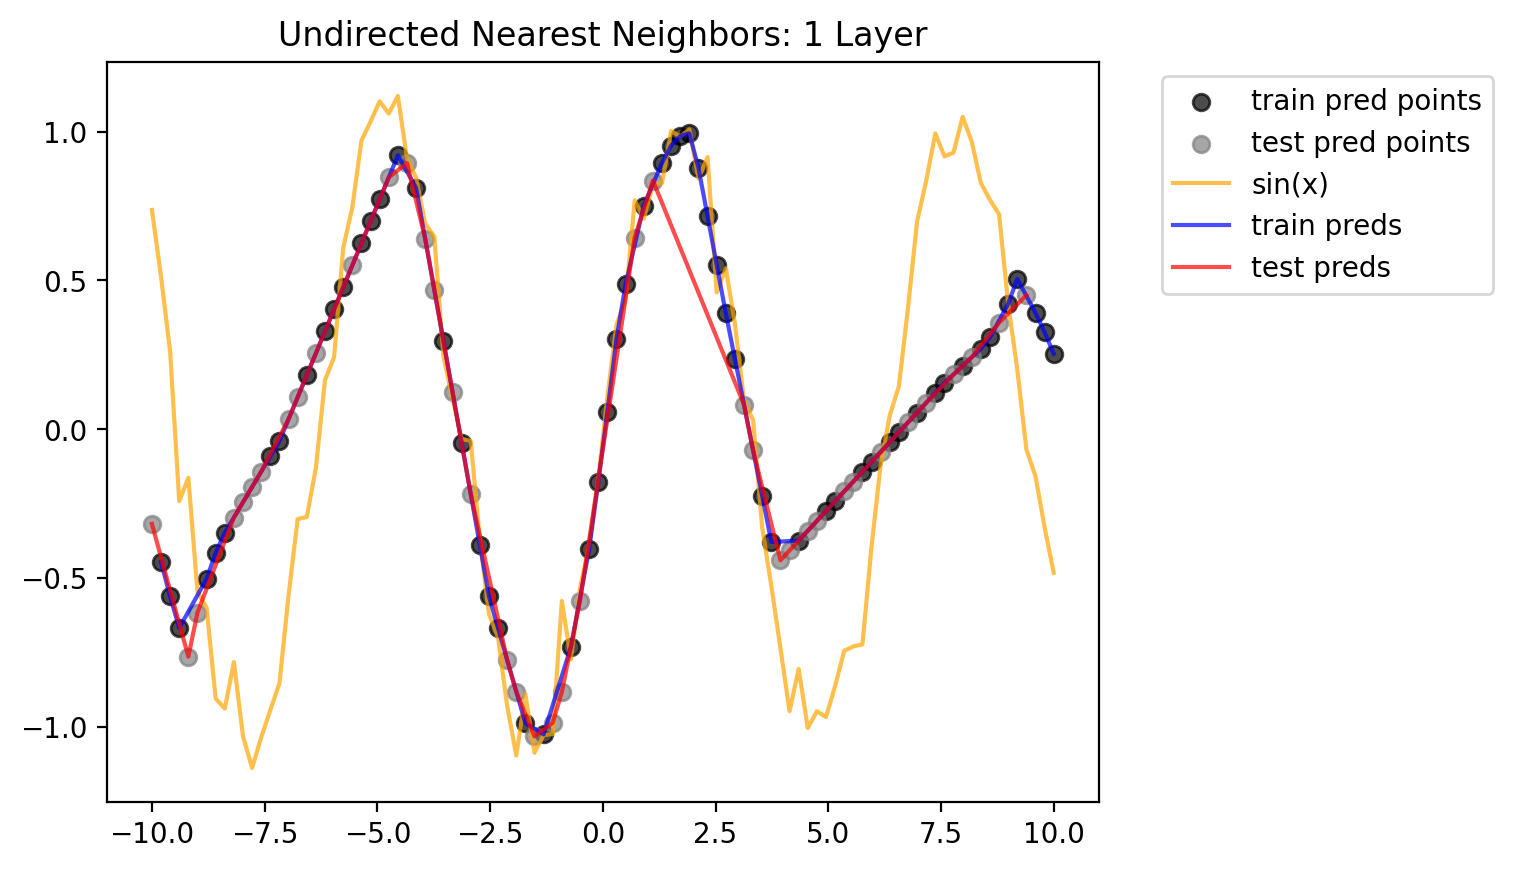

In [8]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = RegressionModel_1(input_dim=1).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
criterion = nn.MSELoss()

train_rmse_list = []
test_rmse_list = []

for epoch in tqdm(range(5000)):
    optimizer.zero_grad()
    out = model(data.x.unsqueeze(1).to(device), data.edge_index.to(device))
    loss = criterion(out[data.train_mask].squeeze(), data.y[data.train_mask].squeeze())
    loss.backward()
    optimizer.step()
    if(epoch%20==0):
        model.eval()
        with torch.no_grad():
            out = model(data.x.unsqueeze(1).to(device), data.edge_index.to(device))  # Predicted PM values
            train_rmse = torch.sqrt(torch.mean((out[data.train_mask].squeeze() - data.y[data.train_mask].squeeze())**2))
            test_rmse = torch.sqrt(torch.mean((out[data.test_mask].squeeze() - data.y[data.test_mask].squeeze())**2))
            train_rmse_list.append(train_rmse.item())
            test_rmse_list.append(test_rmse.item())
        model.train()

model.eval()
with torch.no_grad():
    out = model(data.x.unsqueeze(1).to(device), data.edge_index.to(device))  # Predicted PM values
    train_rmse = torch.sqrt(torch.mean((out[data.train_mask].squeeze() - data.y[data.train_mask].squeeze())**2))
    test_rmse = torch.sqrt(torch.mean((out[data.test_mask].squeeze() - data.y[data.test_mask].squeeze())**2))
    print("Train RMSE", train_rmse.cpu().numpy())
    print("Test RMSE", test_rmse.cpu().numpy())        

plt.plot(range(0, 20*len(train_rmse_list), 20), train_rmse_list, label='Train Loss')
plt.plot(range(0, 20*len(test_rmse_list), 20), test_rmse_list, label='Test Loss')
plt.xlabel('RMSE')
plt.ylabel('Epoch')
plt.legend()
plt.show()

out = model(data.x.unsqueeze(1).to(device), data.edge_index.to(device))  # Predicted PM values
train_preds = out[data.train_mask].cpu().squeeze().detach().numpy()
test_preds = out[data.test_mask].cpu().squeeze().detach().numpy()

plt.scatter(data.x[data.train_mask].cpu(), train_preds, color = 'black', label = 'train pred points', alpha = 0.7)
plt.scatter(data.x[data.test_mask].cpu(), test_preds, color = 'grey', label = 'test pred points', alpha = 0.7)
plt.plot(x, y, label = 'sin(x)', color = 'orange', alpha = 0.7)

plt.plot(data.x[data.train_mask].cpu(), train_preds, color = 'blue', label = 'train preds', alpha = 0.7)
plt.plot(data.x[data.test_mask].cpu(), test_preds, color = 'red', label = 'test preds',alpha = 0.7)

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.title('Undirected Nearest Neighbors: 1 Layer')
plt.show()

# With Two Layers

100%|██████████| 5000/5000 [00:23<00:00, 216.44it/s]


Train RMSE 0.3024833
Test RMSE 0.32044408


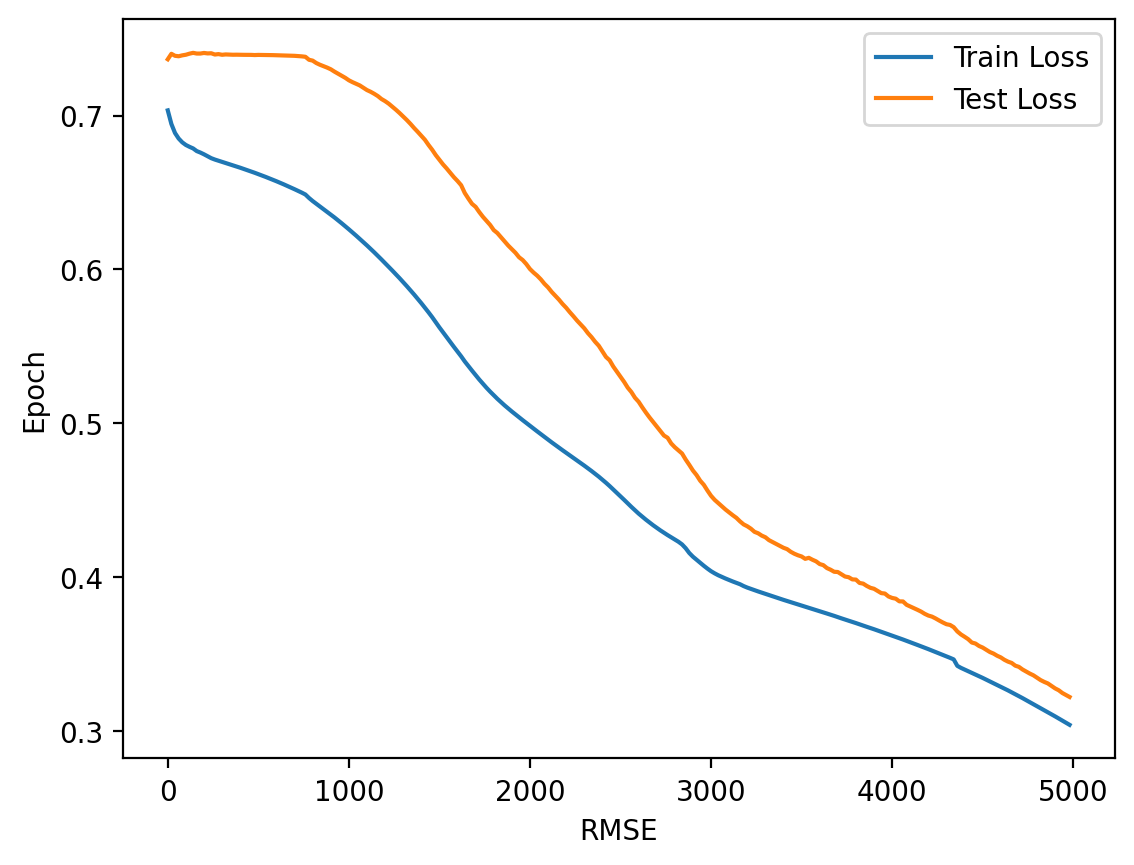

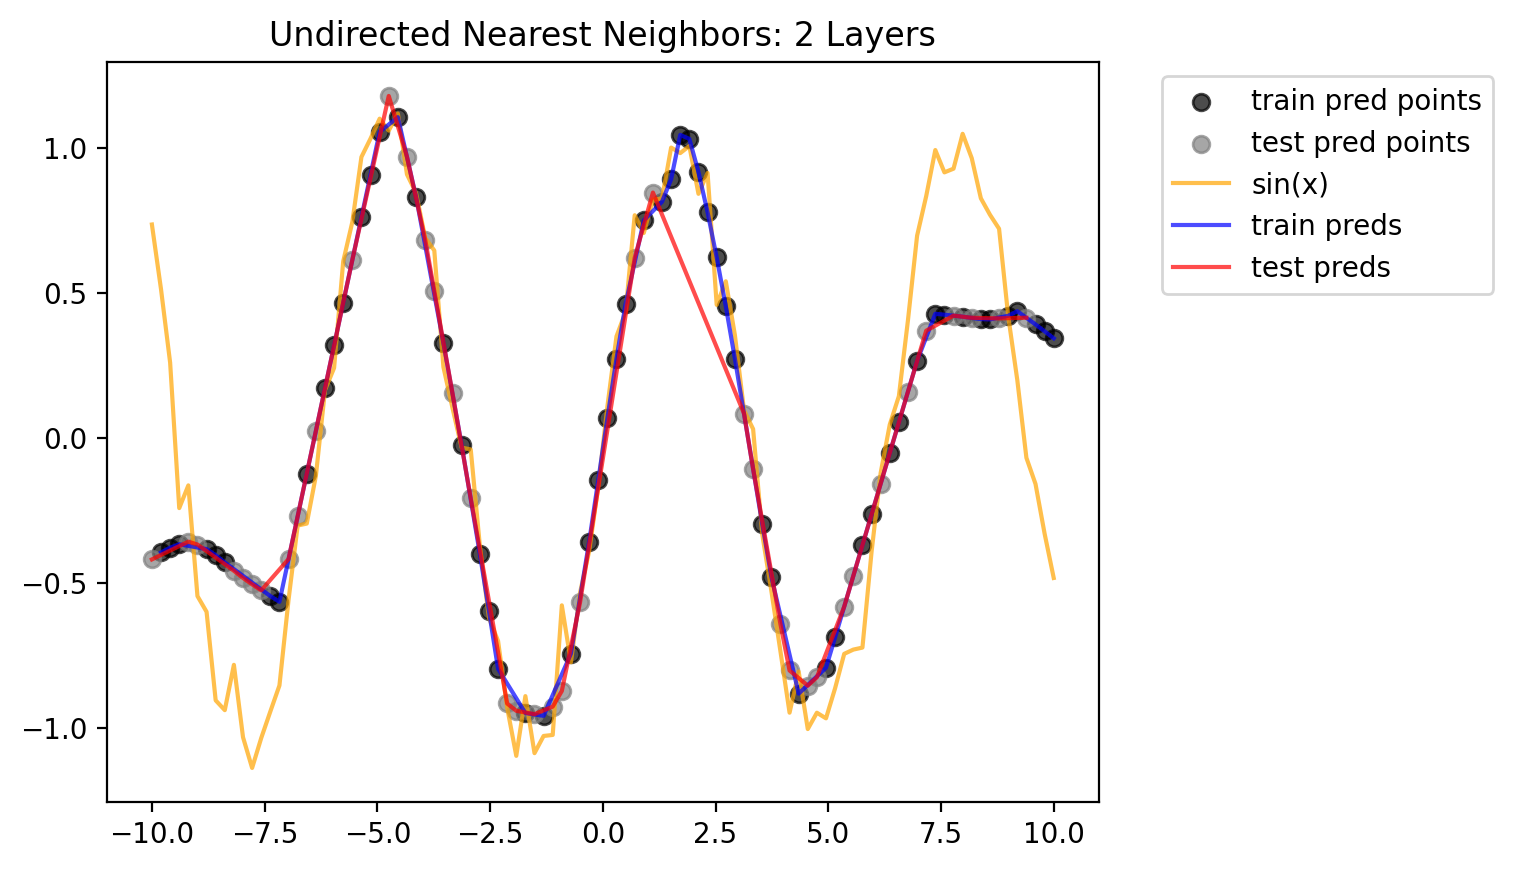

In [9]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = RegressionModel_2(input_dim=1).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
criterion = nn.MSELoss()

train_rmse_list = []
test_rmse_list = []

for epoch in tqdm(range(5000)):
    optimizer.zero_grad()
    out = model(data.x.unsqueeze(1).to(device), data.edge_index.to(device))
    loss = criterion(out[data.train_mask].squeeze(), data.y[data.train_mask].squeeze())
    loss.backward()
    optimizer.step()
    if(epoch%20==0):
        model.eval()
        with torch.no_grad():
            out = model(data.x.unsqueeze(1).to(device), data.edge_index.to(device))  # Predicted PM values
            train_rmse = torch.sqrt(torch.mean((out[data.train_mask].squeeze() - data.y[data.train_mask].squeeze())**2))
            test_rmse = torch.sqrt(torch.mean((out[data.test_mask].squeeze() - data.y[data.test_mask].squeeze())**2))
            train_rmse_list.append(train_rmse.item())
            test_rmse_list.append(test_rmse.item())
        model.train()

model.eval()
with torch.no_grad():
    out = model(data.x.unsqueeze(1).to(device), data.edge_index.to(device))  # Predicted PM values
    train_rmse = torch.sqrt(torch.mean((out[data.train_mask].squeeze() - data.y[data.train_mask].squeeze())**2))
    test_rmse = torch.sqrt(torch.mean((out[data.test_mask].squeeze() - data.y[data.test_mask].squeeze())**2))
    print("Train RMSE", train_rmse.cpu().numpy())
    print("Test RMSE", test_rmse.cpu().numpy())        

plt.plot(range(0, 20*len(train_rmse_list), 20), train_rmse_list, label='Train Loss')
plt.plot(range(0, 20*len(test_rmse_list), 20), test_rmse_list, label='Test Loss')
plt.xlabel('RMSE')
plt.ylabel('Epoch')
plt.legend()
plt.show()

out = model(data.x.unsqueeze(1).to(device), data.edge_index.to(device))  # Predicted PM values
train_preds = out[data.train_mask].cpu().squeeze().detach().numpy()
test_preds = out[data.test_mask].cpu().squeeze().detach().numpy()

plt.scatter(data.x[data.train_mask].cpu(), train_preds, color = 'black', label = 'train pred points', alpha = 0.7)
plt.scatter(data.x[data.test_mask].cpu(), test_preds, color = 'grey', label = 'test pred points', alpha = 0.7)
plt.plot(x, y, label = 'sin(x)', color = 'orange', alpha = 0.7)

plt.plot(data.x[data.train_mask].cpu(), train_preds, color = 'blue', label = 'train preds', alpha = 0.7)
plt.plot(data.x[data.test_mask].cpu(), test_preds, color = 'red', label = 'test preds',alpha = 0.7)

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.title('Undirected Nearest Neighbors: 2 Layers')
plt.show()

# With Three Layers

100%|██████████| 5000/5000 [00:29<00:00, 166.92it/s]


Train RMSE 0.19588254
Test RMSE 0.20684028


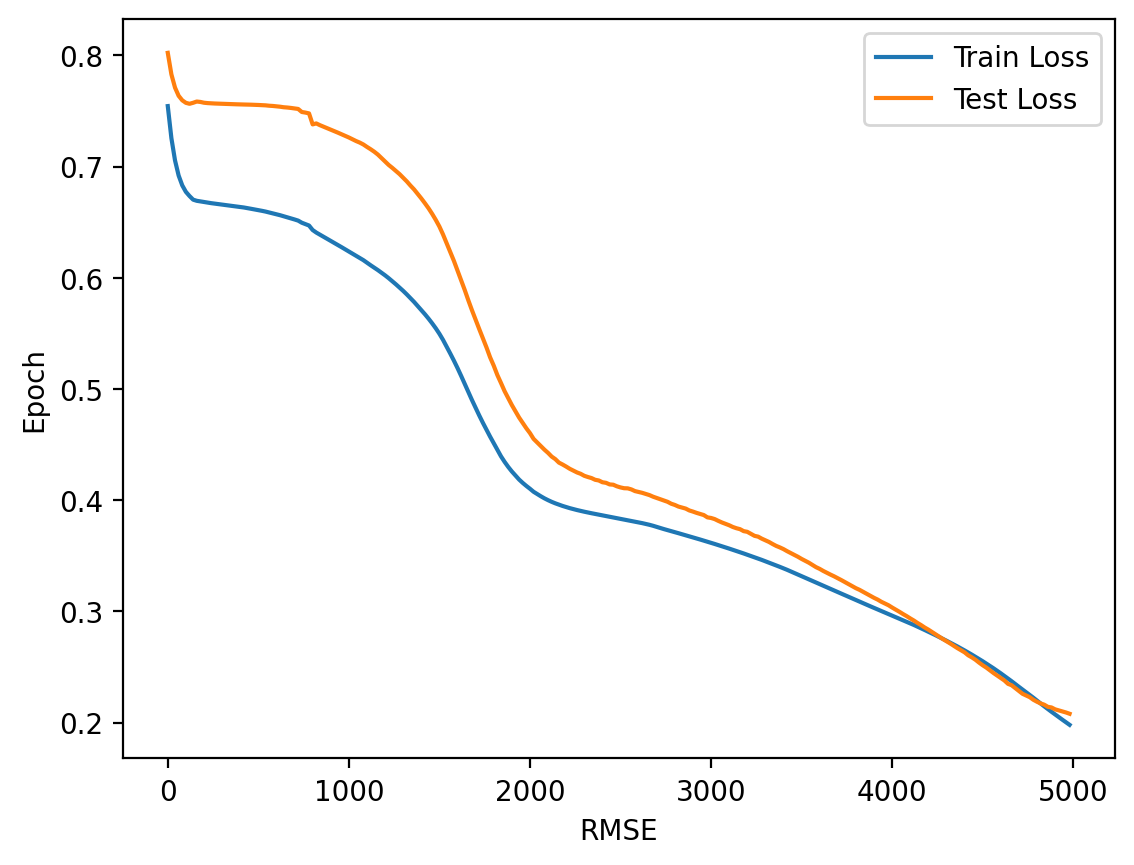

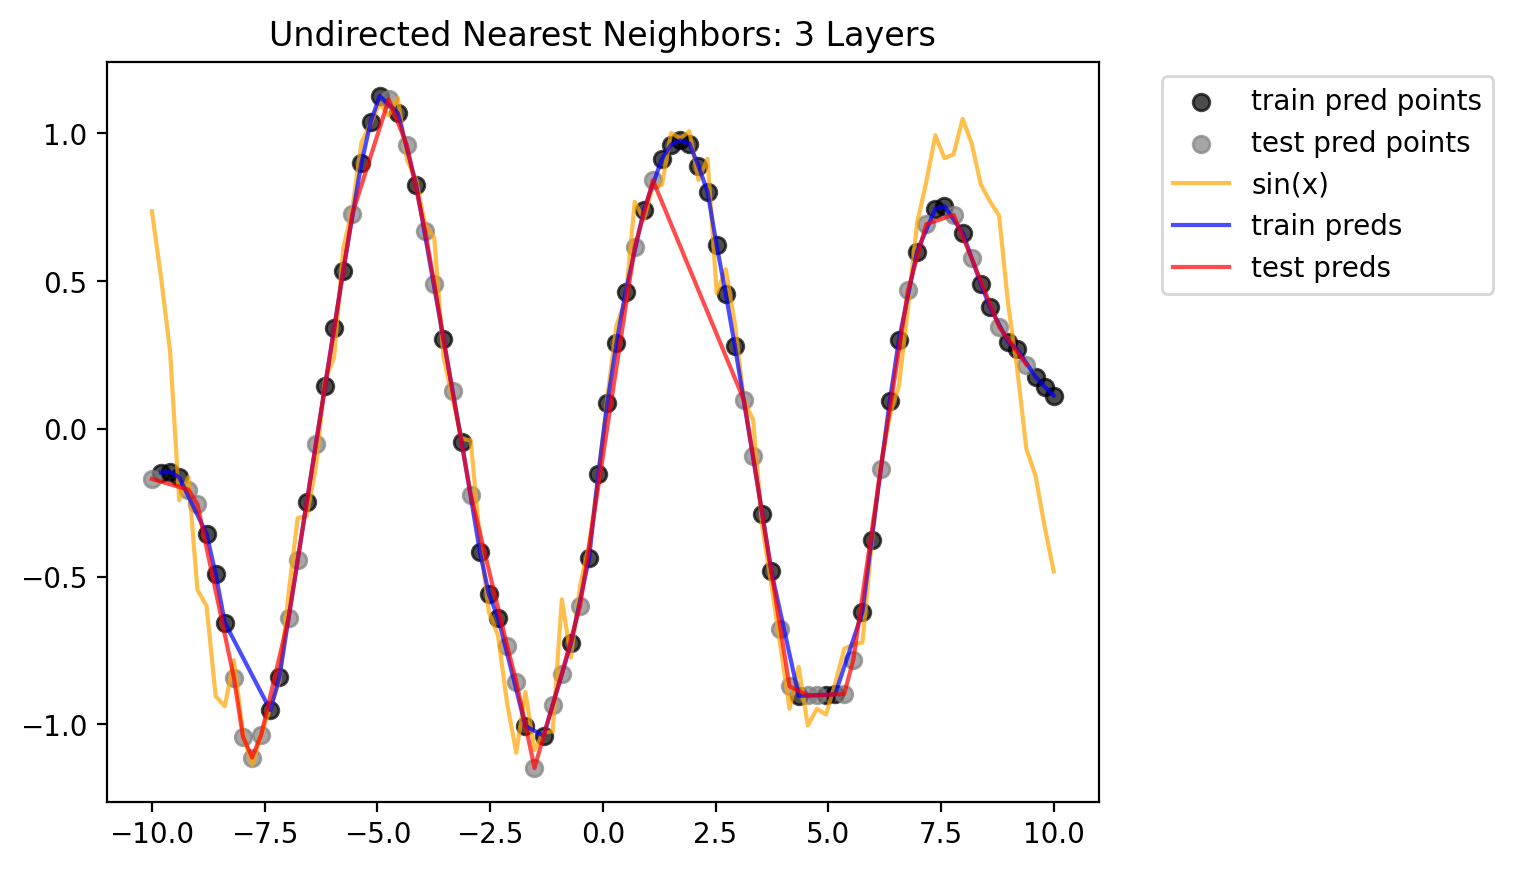

In [10]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = RegressionModel_3(input_dim=1).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
criterion = nn.MSELoss()

train_rmse_list = []
test_rmse_list = []

for epoch in tqdm(range(5000)):
    optimizer.zero_grad()
    out = model(data.x.unsqueeze(1).to(device), data.edge_index.to(device))
    loss = criterion(out[data.train_mask].squeeze(), data.y[data.train_mask].squeeze())
    loss.backward()
    optimizer.step()
    if(epoch%20==0):
        model.eval()
        with torch.no_grad():
            out = model(data.x.unsqueeze(1).to(device), data.edge_index.to(device))  # Predicted PM values
            train_rmse = torch.sqrt(torch.mean((out[data.train_mask].squeeze() - data.y[data.train_mask].squeeze())**2))
            test_rmse = torch.sqrt(torch.mean((out[data.test_mask].squeeze() - data.y[data.test_mask].squeeze())**2))
            train_rmse_list.append(train_rmse.item())
            test_rmse_list.append(test_rmse.item())
        model.train()

model.eval()
with torch.no_grad():
    out = model(data.x.unsqueeze(1).to(device), data.edge_index.to(device))  # Predicted PM values
    train_rmse = torch.sqrt(torch.mean((out[data.train_mask].squeeze() - data.y[data.train_mask].squeeze())**2))
    test_rmse = torch.sqrt(torch.mean((out[data.test_mask].squeeze() - data.y[data.test_mask].squeeze())**2))
    print("Train RMSE", train_rmse.cpu().numpy())
    print("Test RMSE", test_rmse.cpu().numpy())        

plt.plot(range(0, 20*len(train_rmse_list), 20), train_rmse_list, label='Train Loss')
plt.plot(range(0, 20*len(test_rmse_list), 20), test_rmse_list, label='Test Loss')
plt.xlabel('RMSE')
plt.ylabel('Epoch')
plt.legend()
plt.show()

out = model(data.x.unsqueeze(1).to(device), data.edge_index.to(device))  # Predicted PM values
train_preds = out[data.train_mask].cpu().squeeze().detach().numpy()
test_preds = out[data.test_mask].cpu().squeeze().detach().numpy()

plt.scatter(data.x[data.train_mask].cpu(), train_preds, color = 'black', label = 'train pred points', alpha = 0.7)
plt.scatter(data.x[data.test_mask].cpu(), test_preds, color = 'grey', label = 'test pred points', alpha = 0.7)
plt.plot(x, y, label = 'sin(x)', color = 'orange', alpha = 0.7)

plt.plot(data.x[data.train_mask].cpu(), train_preds, color = 'blue', label = 'train preds', alpha = 0.7)
plt.plot(data.x[data.test_mask].cpu(), test_preds, color = 'red', label = 'test preds',alpha = 0.7)

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.title('Undirected Nearest Neighbors: 3 Layers')
plt.show()

# With Four Layers

  0%|          | 0/5000 [00:00<?, ?it/s]

100%|██████████| 5000/5000 [00:34<00:00, 142.95it/s]


Train RMSE 0.112974264
Test RMSE 0.18237089


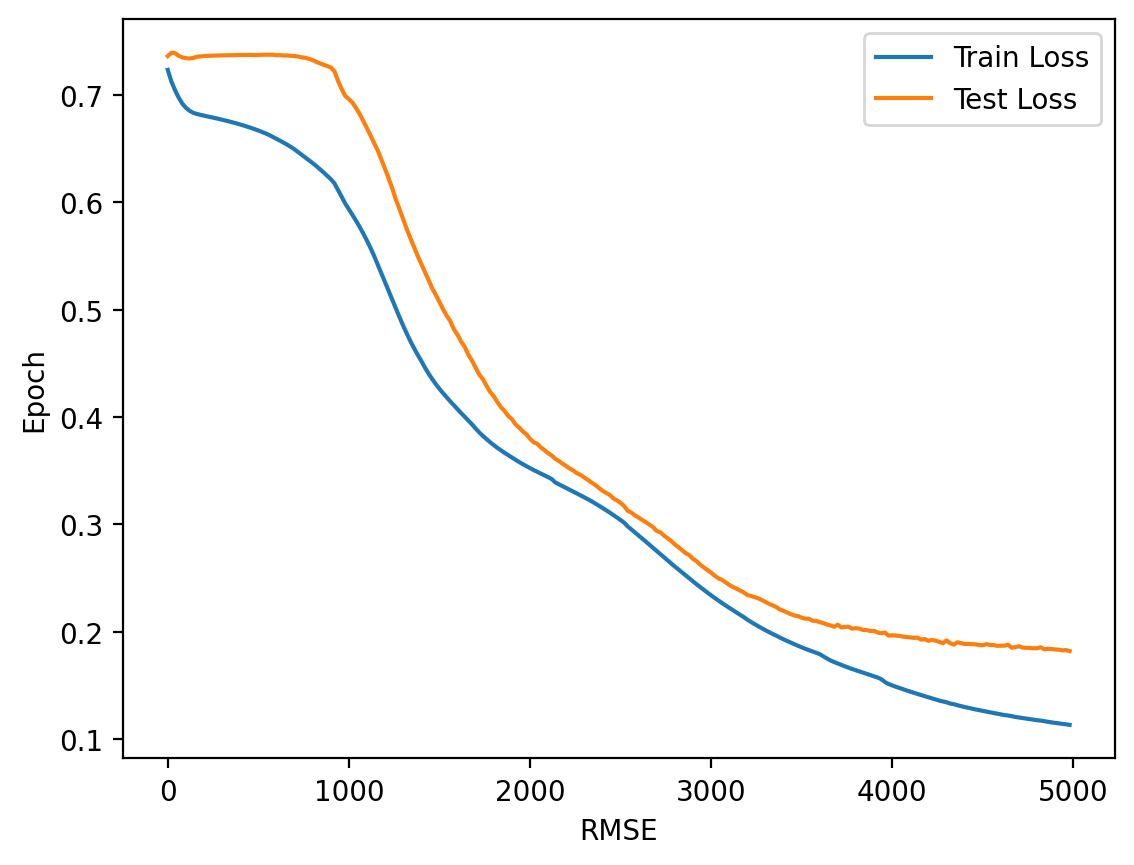

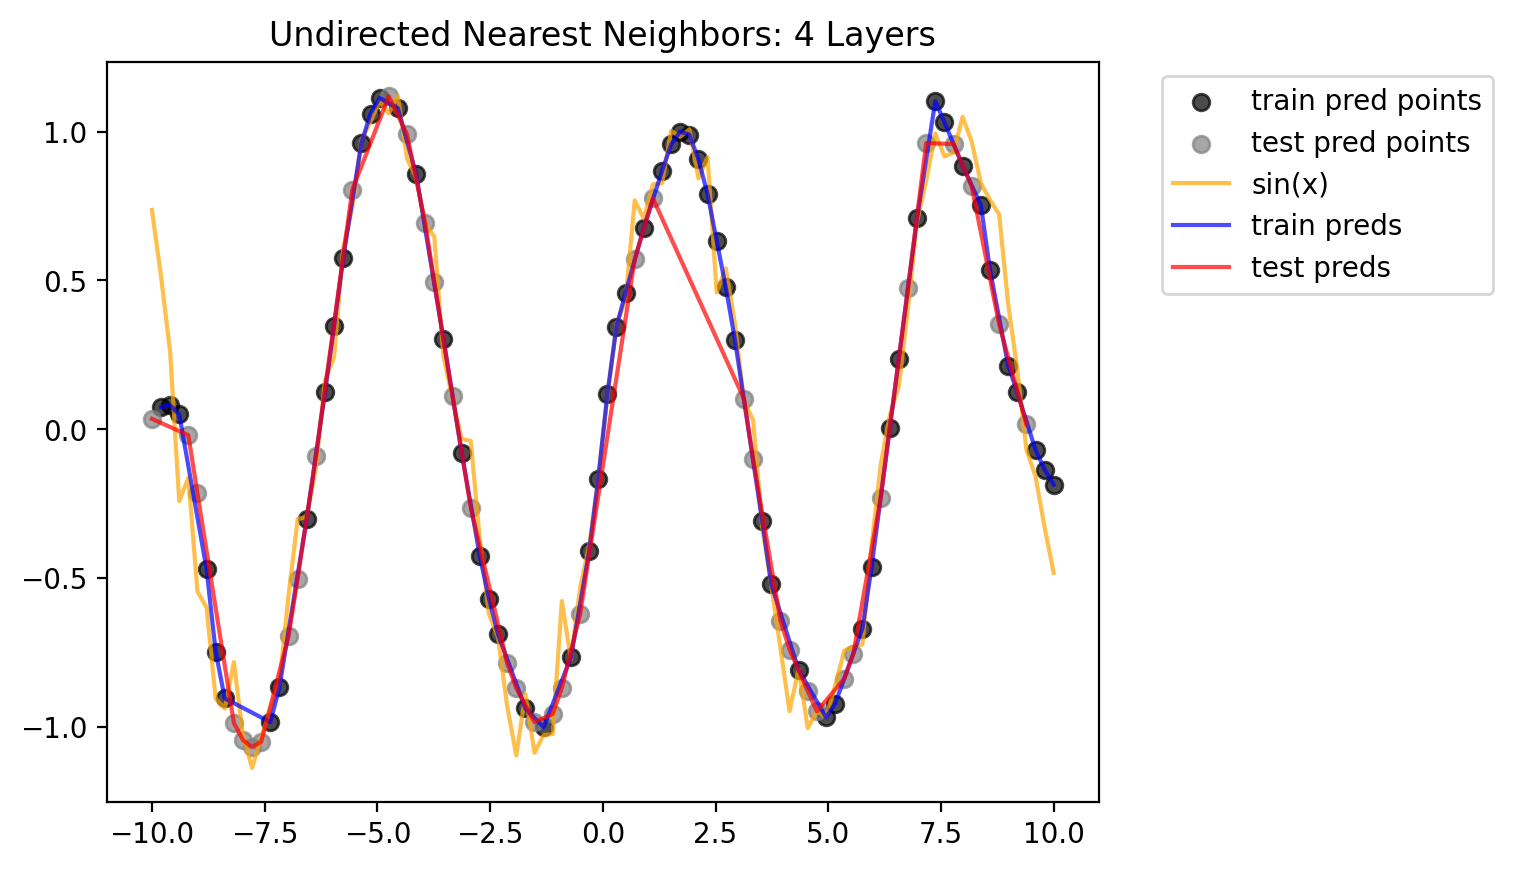

In [11]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = RegressionModel_4(input_dim=1).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
criterion = nn.MSELoss()

train_rmse_list = []
test_rmse_list = []

for epoch in tqdm(range(5000)):
    optimizer.zero_grad()
    out = model(data.x.unsqueeze(1).to(device), data.edge_index.to(device))
    loss = criterion(out[data.train_mask].squeeze(), data.y[data.train_mask].squeeze())
    loss.backward()
    optimizer.step()
    if(epoch%20==0):
        model.eval()
        with torch.no_grad():
            out = model(data.x.unsqueeze(1).to(device), data.edge_index.to(device))  # Predicted PM values
            train_rmse = torch.sqrt(torch.mean((out[data.train_mask].squeeze() - data.y[data.train_mask].squeeze())**2))
            test_rmse = torch.sqrt(torch.mean((out[data.test_mask].squeeze() - data.y[data.test_mask].squeeze())**2))
            train_rmse_list.append(train_rmse.item())
            test_rmse_list.append(test_rmse.item())
        model.train()

model.eval()
with torch.no_grad():
    out = model(data.x.unsqueeze(1).to(device), data.edge_index.to(device))  # Predicted PM values
    train_rmse = torch.sqrt(torch.mean((out[data.train_mask].squeeze() - data.y[data.train_mask].squeeze())**2))
    test_rmse = torch.sqrt(torch.mean((out[data.test_mask].squeeze() - data.y[data.test_mask].squeeze())**2))
    print("Train RMSE", train_rmse.cpu().numpy())
    print("Test RMSE", test_rmse.cpu().numpy())        

plt.plot(range(0, 20*len(train_rmse_list), 20), train_rmse_list, label='Train Loss')
plt.plot(range(0, 20*len(test_rmse_list), 20), test_rmse_list, label='Test Loss')
plt.xlabel('RMSE')
plt.ylabel('Epoch')
plt.legend()
plt.show()

out = model(data.x.unsqueeze(1).to(device), data.edge_index.to(device))  # Predicted PM values
train_preds = out[data.train_mask].cpu().squeeze().detach().numpy()
test_preds = out[data.test_mask].cpu().squeeze().detach().numpy()

plt.scatter(data.x[data.train_mask].cpu(), train_preds, color = 'black', label = 'train pred points', alpha = 0.7)
plt.scatter(data.x[data.test_mask].cpu(), test_preds, color = 'grey', label = 'test pred points', alpha = 0.7)
plt.plot(x, y, label = 'sin(x)', color = 'orange', alpha = 0.7)

plt.plot(data.x[data.train_mask].cpu(), train_preds, color = 'blue', label = 'train preds', alpha = 0.7)
plt.plot(data.x[data.test_mask].cpu(), test_preds, color = 'red', label = 'test preds',alpha = 0.7)

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.title('Undirected Nearest Neighbors: 4 Layers')
plt.show()

# With Five Layers

100%|██████████| 5000/5000 [00:43<00:00, 115.60it/s]


Train RMSE 0.082015894
Test RMSE 0.15695928


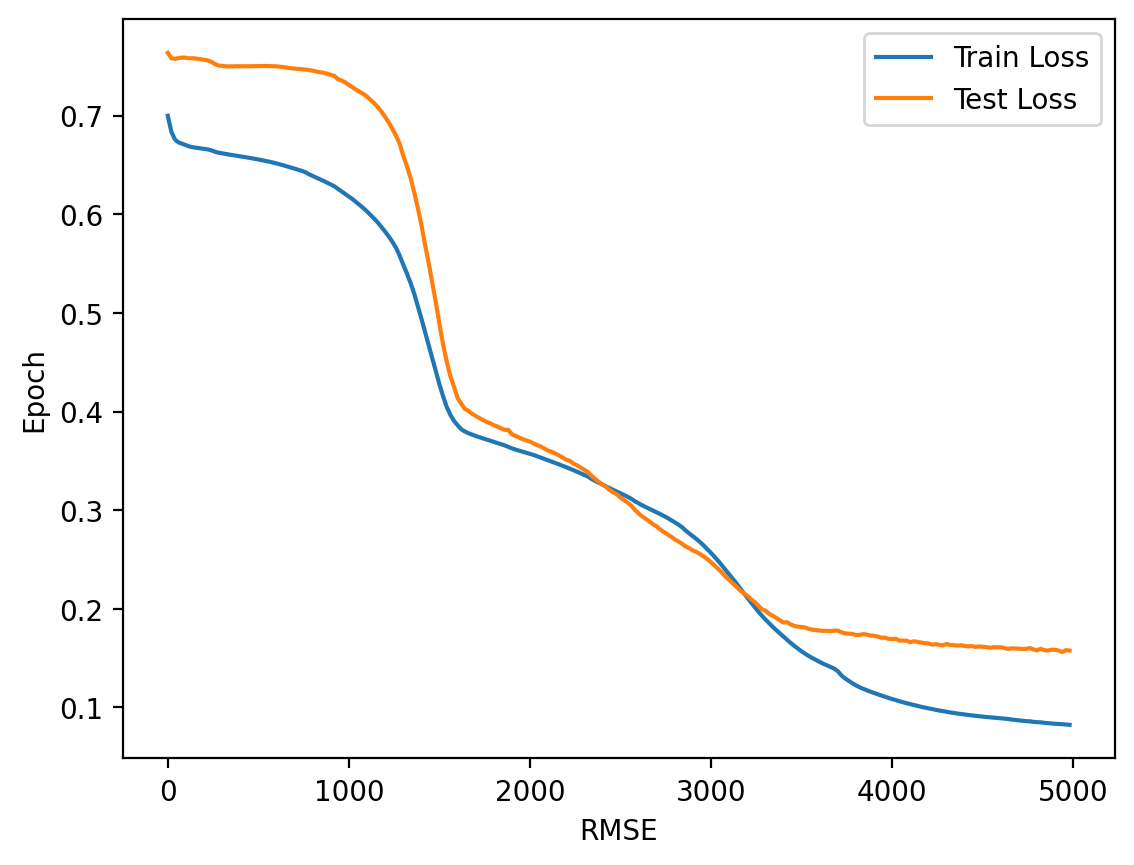

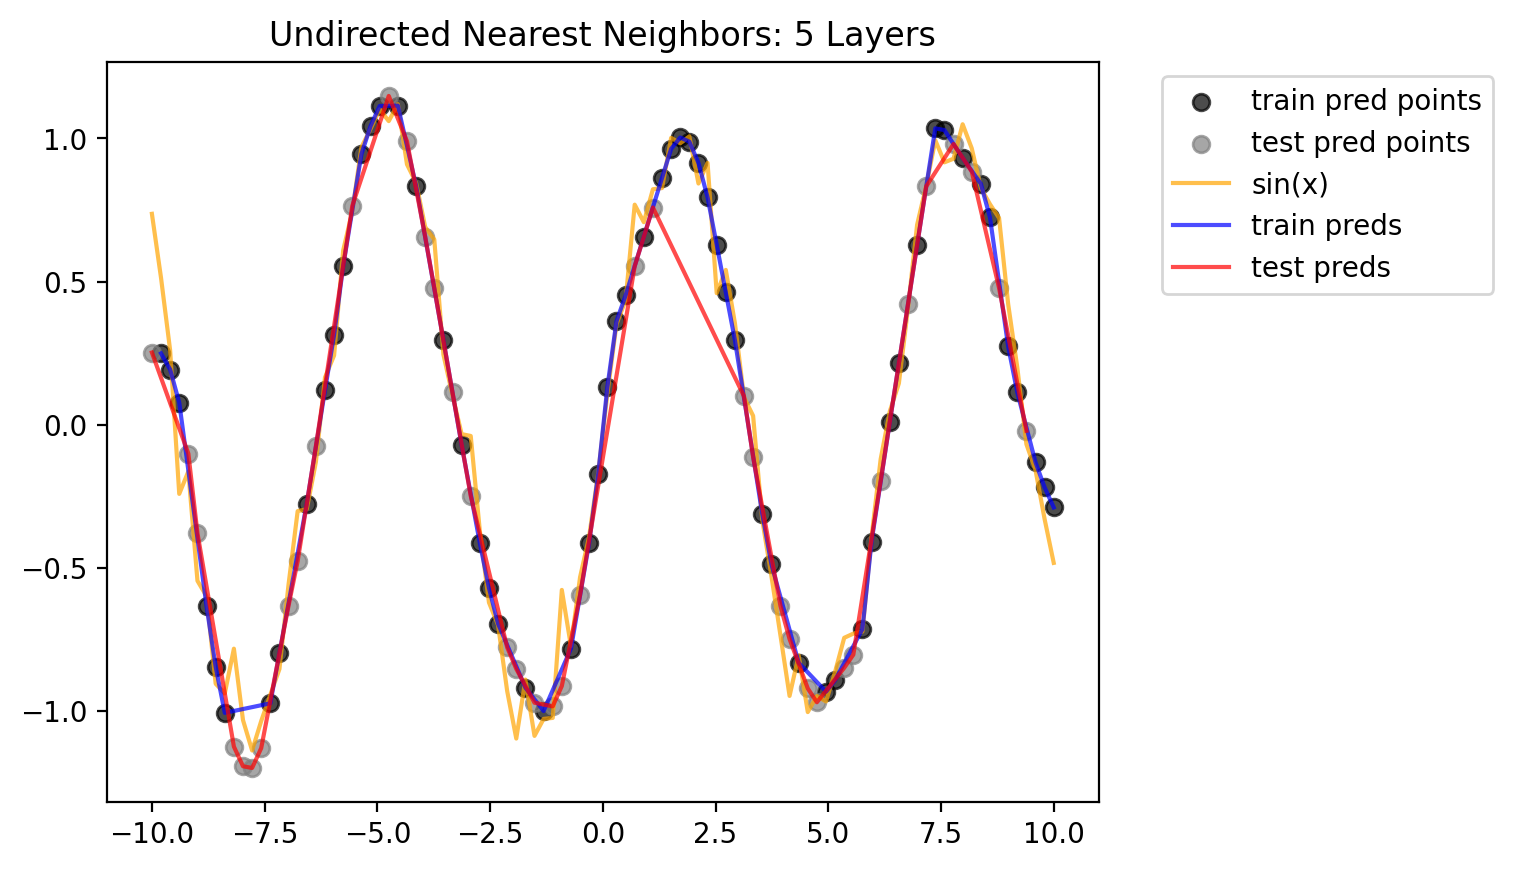

In [12]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = RegressionModel_5(input_dim=1).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
criterion = nn.MSELoss()

train_rmse_list = []
test_rmse_list = []

for epoch in tqdm(range(5000)):
    optimizer.zero_grad()
    out = model(data.x.unsqueeze(1).to(device), data.edge_index.to(device))
    loss = criterion(out[data.train_mask].squeeze(), data.y[data.train_mask].squeeze())
    loss.backward()
    optimizer.step()
    if(epoch%20==0):
        model.eval()
        with torch.no_grad():
            out = model(data.x.unsqueeze(1).to(device), data.edge_index.to(device))  # Predicted PM values
            train_rmse = torch.sqrt(torch.mean((out[data.train_mask].squeeze() - data.y[data.train_mask].squeeze())**2))
            test_rmse = torch.sqrt(torch.mean((out[data.test_mask].squeeze() - data.y[data.test_mask].squeeze())**2))
            train_rmse_list.append(train_rmse.item())
            test_rmse_list.append(test_rmse.item())
        model.train()

model.eval()
with torch.no_grad():
    out = model(data.x.unsqueeze(1).to(device), data.edge_index.to(device))  # Predicted PM values
    train_rmse = torch.sqrt(torch.mean((out[data.train_mask].squeeze() - data.y[data.train_mask].squeeze())**2))
    test_rmse = torch.sqrt(torch.mean((out[data.test_mask].squeeze() - data.y[data.test_mask].squeeze())**2))
    print("Train RMSE", train_rmse.cpu().numpy())
    print("Test RMSE", test_rmse.cpu().numpy())        

plt.plot(range(0, 20*len(train_rmse_list), 20), train_rmse_list, label='Train Loss')
plt.plot(range(0, 20*len(test_rmse_list), 20), test_rmse_list, label='Test Loss')
plt.xlabel('RMSE')
plt.ylabel('Epoch')
plt.legend()
plt.show()

out = model(data.x.unsqueeze(1).to(device), data.edge_index.to(device))  # Predicted PM values
train_preds = out[data.train_mask].cpu().squeeze().detach().numpy()
test_preds = out[data.test_mask].cpu().squeeze().detach().numpy()

plt.scatter(data.x[data.train_mask].cpu(), train_preds, color = 'black', label = 'train pred points', alpha = 0.7)
plt.scatter(data.x[data.test_mask].cpu(), test_preds, color = 'grey', label = 'test pred points', alpha = 0.7)
plt.plot(x, y, label = 'sin(x)', color = 'orange', alpha = 0.7)

plt.plot(data.x[data.train_mask].cpu(), train_preds, color = 'blue', label = 'train preds', alpha = 0.7)
plt.plot(data.x[data.test_mask].cpu(), test_preds, color = 'red', label = 'test preds',alpha = 0.7)

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.title('Undirected Nearest Neighbors: 5 Layers')
plt.show()